# **[GROUP 4 PROJECT] FLOOD PREDICTION MODEL :**


---


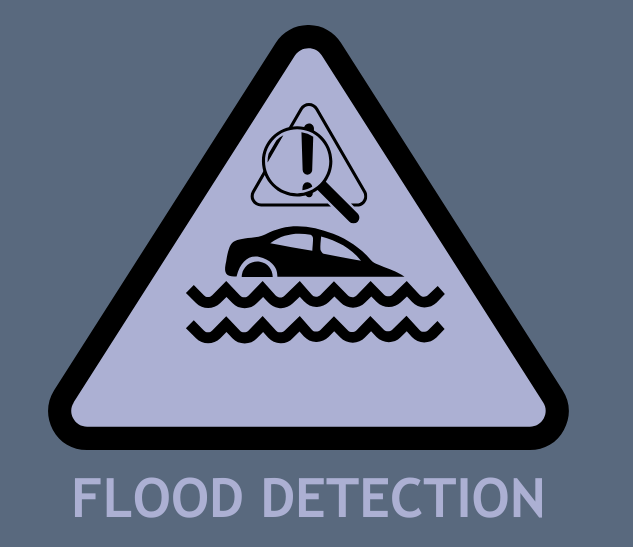



**PREPROCESSING:**

---



In [ ]:
# Importing libraries and loading the dataset.

import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor, early_stopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

data = pd.read_csv('/content/flood.csv')

In [ ]:
# Data Inspection
print("First five rows of the dataset:")
print(data.head().to_string(index=False))

First five rows of the dataset:
 MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  FloodProbability
                3                 8.0                6              6           4.0              4          6.0          2                    3.0              2                              5.0               10                   7.0           4           2                          3.0              4.0            3                   2                 6             0.450
                8                 4.0                5              7           7.0              9          1.0          5                    5.0              4                              6.0                9              

In [ ]:
data.shape

(50000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               49998 non-null  float64
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     49999 non-null  float64
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      49999 non-null  float64
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            49999 non-null  float64
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  49998 non-null  float64
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
# Descriptive Statistics
print("\nData Description:")
print(data.describe().transpose().to_string())


Data Description:
                                   count      mean       std    min    25%  50%    75%     max
MonsoonIntensity                 50000.0  4.991480  2.236834  0.000  3.000  5.0  6.000  16.000
TopographyDrainage               49998.0  4.983859  2.246130  0.000  3.000  5.0  6.000  18.000
RiverManagement                  50000.0  5.015940  2.231310  0.000  3.000  5.0  6.000  16.000
Deforestation                    50000.0  5.008480  2.222743  0.000  3.000  5.0  6.000  17.000
Urbanization                     49999.0  4.989060  2.243181  0.000  3.000  5.0  6.000  17.000
ClimateChange                    50000.0  4.988340  2.226761  0.000  3.000  5.0  6.000  17.000
DamsQuality                      49999.0  5.015240  2.244863  0.000  3.000  5.0  6.000  16.000
Siltation                        50000.0  4.988600  2.232642  0.000  3.000  5.0  6.000  16.000
AgriculturalPractices            49999.0  5.006080  2.234592  0.000  3.000  5.0  6.000  16.000
Encroachments                  

In [ ]:
# Display columns with null values
null_values = data.isnull().sum()
null_columns = null_values[null_values > 0]
print("\nColumns with Null Values:")
print(null_columns.to_string())


Columns with Null Values:
TopographyDrainage                 2
Urbanization                       1
DamsQuality                        1
AgriculturalPractices              1
IneffectiveDisasterPreparedness    2
CoastalVulnerability               1
DeterioratingInfrastructure        1
PopulationScore                    1


In [ ]:
# Fill missing values with column mean
data.fillna(data.mean(), inplace=True)
print("\nDataset after filling missing values with column mean:")
print(data.isnull().sum())


Dataset after filling missing values with column mean:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [ ]:
# correlation matrix for 'FloodProbability'
correlation = data.corr()['FloodProbability'].sort_values(ascending=False)
print("Correlation of 'FloodProbability' with other variables:\n", correlation)

Correlation of 'FloodProbability' with other variables:
 FloodProbability                   1.000000
DeterioratingInfrastructure        0.229379
TopographyDrainage                 0.229331
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227536
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225093
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221844
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215039
Name: FloodProbabil

In [ ]:
# Calculate skewness of 'FloodProbability'.
original_skewness = skew(data['FloodProbability'])
print(f"Skewness: {original_skewness:.2f}")

Skewness: 0.10


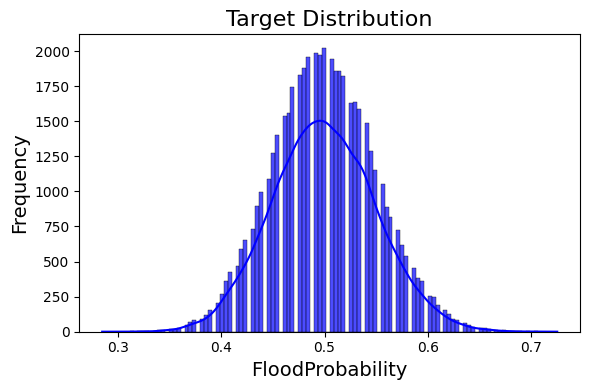

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['FloodProbability'], kde=True, color='blue', alpha=0.7)
plt.title('Target Distribution', fontsize=16)
plt.xlabel('FloodProbability', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

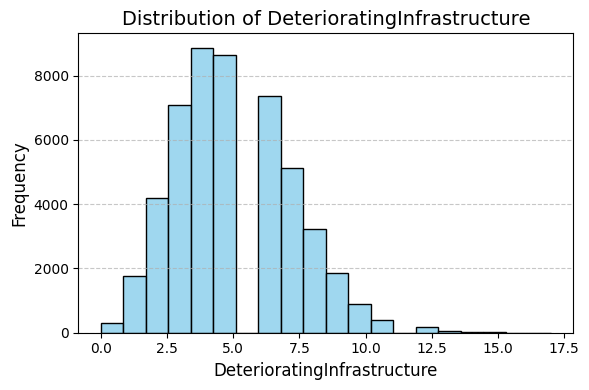

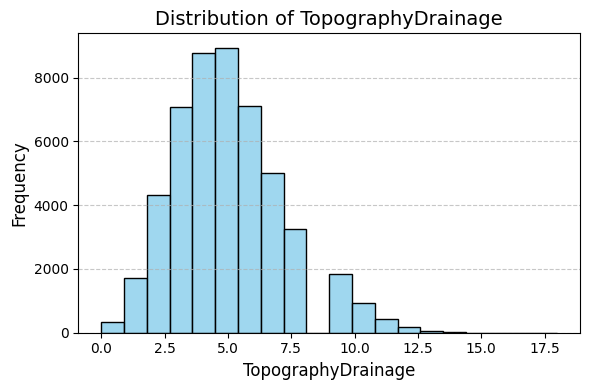

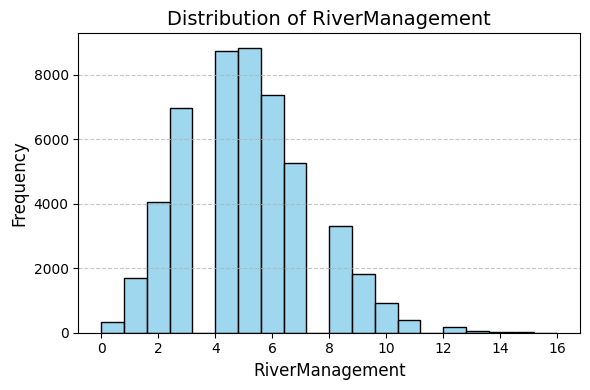

In [ ]:

top_features = correlation.index[1:4]

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], bins=20, kde=False, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
# Splitting data into features (X) and target (y).
X = data.drop('FloodProbability', axis=1)
y = data['FloodProbability']

In [ ]:
# Displaying the first five rows of the feature set (X).
X.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                 8.0                6              6   
1                 8                 4.0                5              7   
2                 3                10.0                4              1   
3                 4                 4.0                2              7   
4                 3                 7.0                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0           4.0              4          6.0          2                    3.0   
1           7.0              9          1.0          5                    5.0   
2           7.0              5          4.0          7                    4.0   
3           3.0              4          1.0          4                    6.0   
4           5.0              8          5.0          2                    7.0   

   Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  \
0              2                              5.0               10   
1              4                              6.0                9   
2              9                              2.0                7   
3              4                              9.0                4   
4              5                              7.0                7   

   CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  \
0                   7.0           4           2                          3.0   
1                   2.0           6           2                          1.0   
2                   4.0           4           8                          6.0   
3                   2.0           6           6                          8.0   
4                   6.0           5           3                          3.0   

   PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  
0              4.0            3                   2                 6  
1              1.0            9                   1                 3  
2              1.0            8                   3                 6  
3              8.0            6                   6                10  
4              4.0            4                   3                 4

In [ ]:
# Data set is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (33333, 20)
Test set shape: (16667, 20)



**LIGHTGBM**
---


---




In [83]:
lgbm = LGBMRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=20,
    num_leaves=50,
    min_child_samples=20,
    subsample=0.9,
    random_state=42,
    verbose = 0
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[early_stopping(stopping_rounds=20, verbose=False)]
)


y_train_pred = lgbm.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Error Metrics [TRAIN]:")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")



Training Error Metrics [TRAIN]:
Mean Absolute Error (MAE): 0.0070
Mean Squared Error (MSE): 0.000082
Root Mean Squared Error (RMSE): 0.0090
R² Score: 0.9676


<ipython-input-61-ae1f9609bb9f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


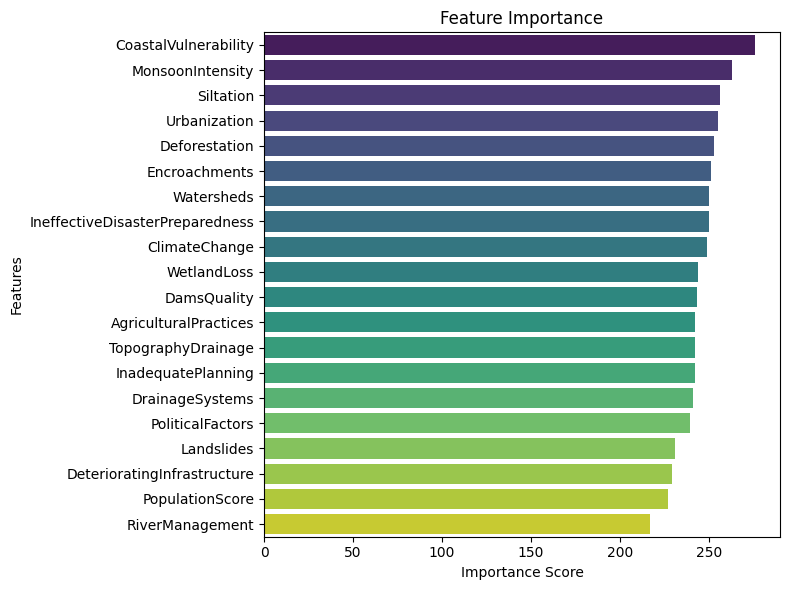

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [82]:
y_pred = lgbm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Testing Evaluation Metrics [BEFORE TUNING]:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Testing Evaluation Metrics [BEFORE TUNING]:
Mean Absolute Error (MAE): 0.0100
Mean Squared Error (MSE): 0.000170
Root Mean Squared Error (RMSE): 0.0130
R² Score: 0.9312


**TRAINING THE MODEL ON TOP 3 FEATURES:**

---



In [ ]:
top_features = ['DeterioratingInfrastructure', 'TopographyDrainage', 'RiverManagement']
X_train_top3 = X_train[top_features]
X_test_top3 = X_test[top_features]

top_3 = LGBMRegressor(learning_rate=0.05, n_estimators=100, random_state=42)
top_3.fit(X_train_top3, y_train)

y_pred_top3 = top_3.predict(X_test_top3)
y_pred_top3_binary = (y_pred_top3 > threshold).astype(int)

print("Classification Report top 3:")
print(classification_report(y_test_binary, y_pred_top3_binary, target_names=["No Flood (0)", "Flood (1)"]))

Classification Report top 3:
              precision    recall  f1-score   support

No Flood (0)       0.65      0.64      0.65      8870
   Flood (1)       0.60      0.60      0.60      7797

    accuracy                           0.62     16667
   macro avg       0.62      0.62      0.62     16667
weighted avg       0.62      0.62      0.62     16667



**TRAINING THE MODEL ON TOP 10 FEATURES:**

---



In [ ]:
top_10_features = correlation.index[1:11].tolist()

X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

top_10_model = LGBMRegressor(learning_rate=0.05, n_estimators=100, random_state=42)
top_10_model.fit(X_train_top10, y_train)

y_pred_top10 = top_10_model.predict(X_test_top10)
y_pred_binary = (y_pred_top10 > threshold).astype(int)

print(classification_report(y_test_binary, y_pred_binary, target_names=["No Flood (0)", "Flood (1)"]))

              precision    recall  f1-score   support

No Flood (0)       0.77      0.74      0.76      8870
   Flood (1)       0.72      0.75      0.73      7797

    accuracy                           0.75     16667
   macro avg       0.74      0.75      0.74     16667
weighted avg       0.75      0.75      0.75     16667



**LIGHTGBM TUNING:**

---



In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [10, 20],
    'n_estimators': [100, 500],
    'min_child_samples': [20, 50],
    'reg_lambda': [0.1, 0.2],
    'colsample_bytree': [0.8],
    'subsample': [0.8]
}

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_samples': 50, 'n_estimators': 500, 'reg_lambda': 0.1, 'subsample': 0.8}
Best Score: 7.43608434437011e-05


**EVALUATIONS AFTER TUNING:**

---



              precision    recall  f1-score   support

No Flood (0)       0.96      0.91      0.93      8870
   Flood (1)       0.90      0.95      0.93      7797

    accuracy                           0.93     16667
   macro avg       0.93      0.93      0.93     16667
weighted avg       0.93      0.93      0.93     16667



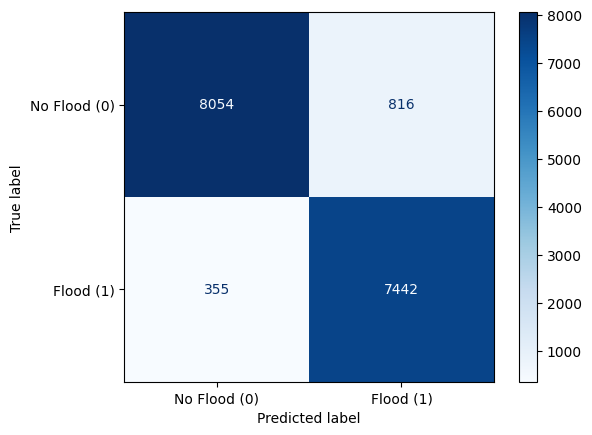

In [ ]:
# Evaluate the best model and display results.

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test_binary, y_pred_class, target_names=["No Flood (0)", "Flood (1)"]))

cm = confusion_matrix(y_test_binary, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Flood (0)", "Flood (1)"])
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0058
Mean Squared Error (MSE): 0.000058
Root Mean Squared Error (RMSE): 0.0076
R² Score: 0.9766


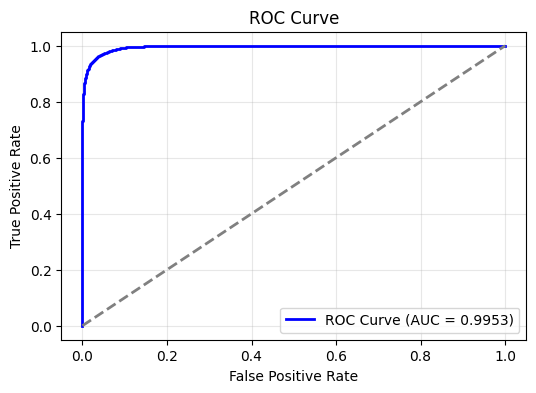

In [ ]:
y_pred_proba = best_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# **SVR:**

---



Optimal Threshold: 0.5042850340757487
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8870
           1       0.92      0.85      0.88      7797

    accuracy                           0.89     16667
   macro avg       0.90      0.89      0.89     16667
weighted avg       0.89      0.89      0.89     16667



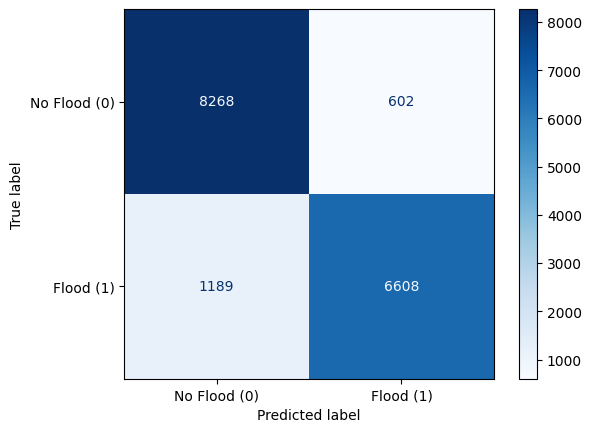

In [ ]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test_binary, svr_predictions)

optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

y_pred_binary_optimal = (svr_predictions > optimal_threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary_optimal))

cm = confusion_matrix(y_test_binary, y_pred_binary_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Flood (0)", "Flood (1)"])
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.show()

In [ ]:
svr_rmse = root_mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
mae = mean_absolute_error(y_test, svr_predictions)
mse = mean_squared_error(y_test, svr_predictions)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {svr_rmse:.4f}")
print(f"R² Score: {svr_r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0397
Mean Squared Error (MSE): 0.002460
Root Mean Squared Error (RMSE): 0.0496
R² Score: 0.0029


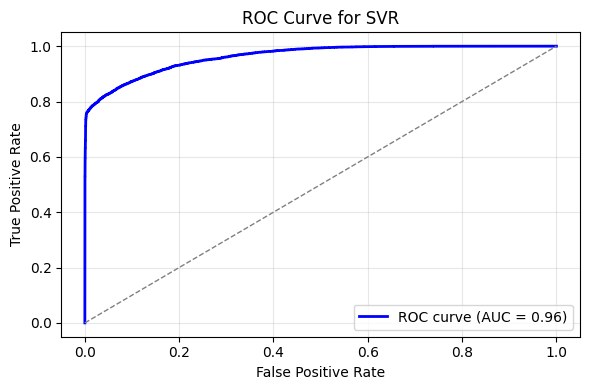

In [ ]:
fpr, tpr, _ = roc_curve(y_test_binary, svr_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVR')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **RANDOM FOREST REGRESSOR:**

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_rf_pred = rf_regressor.predict(X_test)

In [79]:
mae = mean_absolute_error(y_test, y_rf_pred)
mse = mean_squared_error(y_test, y_rf_pred)
rmse = root_mean_squared_error(y_test, y_rf_pred)
r2 = r2_score(y_test, y_rf_pred)

print("Model Evaluation Metrics (RandomForestRegressor):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics (RandomForestRegressor):
Mean Absolute Error (MAE): 0.0205
Mean Squared Error (MSE): 0.000676
Root Mean Squared Error (RMSE): 0.0260
R² Score: 0.7260



Classification Report (Random Forest):
              precision    recall  f1-score   support

No Flood (0)       0.87      0.94      0.90      8870
   Flood (1)       0.93      0.84      0.88      7797

    accuracy                           0.89     16667
   macro avg       0.90      0.89      0.89     16667
weighted avg       0.89      0.89      0.89     16667



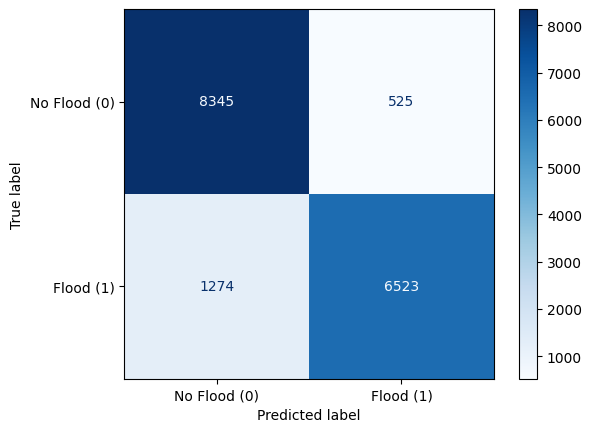

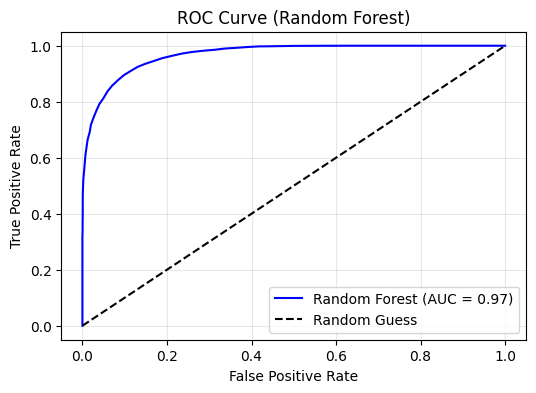

In [80]:
print("\nClassification Report (Random Forest):")
print(classification_report(y_test_binary, y_rf_pred_class, target_names=['No Flood (0)', 'Flood (1)']))

cm = confusion_matrix(y_test_binary, y_rf_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Flood (0)", "Flood (1)"])
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.show()

fpr, tpr, _ = roc_curve(y_test_binary, y_rf_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()